<a href="https://colab.research.google.com/github/TeodoroMas/Pippo/blob/master/Ex9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Mon May  2 12:18:58 2022

@author: lucat
"""
#%%
%reset -f
import matplotlib.pyplot as plt
import skimage.io as io
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers

In [ ]:
!wget -q -c http://www.grip.unina.it/download/guide_TF/dogs_vs_cats.zip
!unzip -q -n dogs_vs_cats.zip


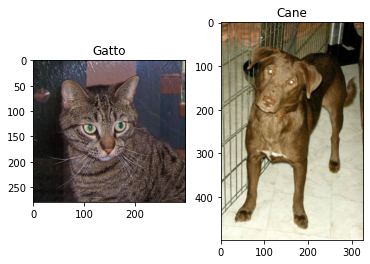

In [ ]:
cat = io.imread('dogs_vs_cats/train/cat/cat.1.jpg')
dog = io.imread('dogs_vs_cats/train/dog/dog.1.jpg')
plt.figure()
plt.subplot(1,2,1); plt.imshow(cat); plt.title("Gatto")
plt.subplot(1,2,2); plt.imshow(dog); plt.title("Cane")
plt.show()


In [ ]:

filename = '/content/dogs'


from tensorflow.keras.preprocessing.image import ImageDataGenerator
dg = ImageDataGenerator(rescale=1/255, zoom_range=0.2, horizontal_flip=True)

train_gen = dg.flow_from_directory('/content/dogs_vs_cats/train',batch_size=8,target_size=(150,150),class_mode='categorical')

dg = ImageDataGenerator(rescale=1/255)  #test
valid_gen= dg.flow_from_directory('/content/dogs_vs_cats/validation',batch_size=8,target_size=(150,150),class_mode='categorical')








Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [ ]:
base_model = keras.applications.Xception(weights="imagenet",input_shape=(150,150,3),include_top=False)  #1000

base_model.summary()


In [ ]:
model = keras.models.Sequential()
model.add(base_model)
model.add(layers.GlobalAveragePooling2D())  #
model.add(layers.Dense(2,activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 5, 5, 2048)        20861480  
                                                                 
 global_average_pooling2d_2   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_1 (Dense)             (None, 2)                 4098      
                                                                 
Total params: 20,865,578
Trainable params: 20,811,050
Non-trainable params: 54,528
_________________________________________________________________


In [ ]:
num_livelli_fissi = 25
for livello in base_model.layers[0:num_livelli_fissi]:           #i primi 25 liveli non sranno addestrati
  livello.trainable = False

model.summary()

In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.SGD(learning_rate=1e-4, momentum=0.9), metrics=['accuracy',])

model.fit(train_gen, epochs=1, validation_data=valid_gen, verbose=1)  #addestramento



2500/2500 [==============================] - 397s 156ms/step - loss: 0.3944 - accuracy: 0.8181 - val_loss: 0.2087 - val_accuracy: 0.9272


In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

batch_size = 8
img_width, img_height = 150, 150
train_generator = train_datagen.flow_from_directory('dogs_vs_cats/train/',
                                                    target_size=(img_width, img_height),
                                                    batch_size=batch_size,
                                                    class_mode='categorical')

val_datagen = ImageDataGenerator(rescale=1. / 255)
val_generator = val_datagen.flow_from_directory('dogs_vs_cats/validation/',
                                                target_size=(img_width, img_height),
                                                batch_size=batch_size,
                                                class_mode='categorical')

#%%
# ResNet50 pre-addestrata
base_model = keras.applications.ResNet50(weights='imagenet', include_top=False,
                                         input_shape=(img_width, img_height, 3))

from tensorflow.keras import layers
model = keras.models.Sequential()
model.add(base_model)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(2, activation='softmax'))

train_after_layer = 25
for layer in base_model.layers[:train_after_layer]:
    layer.trainable = False

model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.SGD(learning_rate=1e-4, momentum=0.9),
              metrics=['accuracy', ])

model.fit(train_generator, epochs=1, validation_data=val_generator, verbose=True)